In [1]:
from Hierarchy.PipelineFunctions.MainWorkers import times_when_method_better, MakeDendogram, generator, RunExperiment, ReadLogs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import pickle

/var/folders/7g/1dqbz5hx5994z2r91kw1_k2m0000gn/T/ipykernel_41580/613665142.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
def generation(size, dim):
    norm_dist = sts.norm(0, 1000)
    x = norm_dist.rvs(size).astype(int)

    if dim == 1:
        y = np.zeros(len(x))
    elif dim == 2:
        y = norm_dist.rvs(size).astype(int)

    points = list(zip(x, y))
    points = np.unique(points, axis=0)
    
    return np.array(points)

In [3]:
sample_size = 100
iter_number = 100
dim = 2
file_name = generator(generation, 60000, sample_size, iter_number, dim)

In [4]:
# file_name = './new_LOGS/1dim-100-100 2023-04-25 12:40:43/Samples'

In [5]:
file_samples = open(file_name, 'rb')
Samples = pickle.load(file_samples)

In [6]:
for dist_metric in ('euclidean', 'cityblock', 'chebyshev'):
    RunExperiment(dist_metric, file_name[:-8], Samples)

100%|██████████| 100/100 [02:56<00:00,  1.77s/it]


In [7]:
# ПРОВЕРКА НА МОНОТОННОСТЬ
for file_ultra in (f"{file_name[:-8]}/{name}" for name in ('euclidean', 'cityblock', 'chebyshev')):
    TimeLogsList, Ultradists, MaxList, SumList, NameOfMethodList, NormDiff = ReadLogs(file_ultra)
    flag = 0
    for num, ultra in enumerate(Ultradists):
        if sorted(ultra) != ultra:
            display(HTML(f'<h4> The methods in {file_ultra}</h4>'))
            print(f"Пример номер {NameOfMethodList[num]}: {num}")
            print(ultra)
            print()
            flag = 1
    if flag != 1:
        display(HTML(f'<h4> The methods in {file_ultra} is monotonous</h4>'))

In [8]:
ResultsForMaxList = {}
ResultsForSumList = {}
for dist_metric in ('euclidean', 'cityblock', 'chebyshev'):
    dist_metric_dir = f"{file_name[:-8]}/{dist_metric}"
    
    TimeLogsList, Ultradists, MaxList, SumList, NameOfMethodList, NormDiff = ReadLogs(dist_metric_dir)

    MaxMatrix = pd.DataFrame({'MetricsByMethodsForMax': MaxList, 'NameOfMethod': NameOfMethodList})
    grouper = MaxMatrix.groupby('NameOfMethod')
    ResultsForMax = pd.concat([pd.Series(v['MetricsByMethodsForMax'].tolist(), name=k) for k, v in grouper], axis=1)
    ResultsForMaxList[dist_metric] = ResultsForMax

    SumMatrix = pd.DataFrame({'MetricsByMethodsForSum': SumList, 'NameOfMethod': NameOfMethodList})
    grouper = SumMatrix.groupby('NameOfMethod')
    ResultsForSum = pd.concat([pd.Series(v['MetricsByMethodsForSum'].tolist(), name=k) for k, v in grouper], axis=1)
    ResultsForSumList[dist_metric] = ResultsForSum

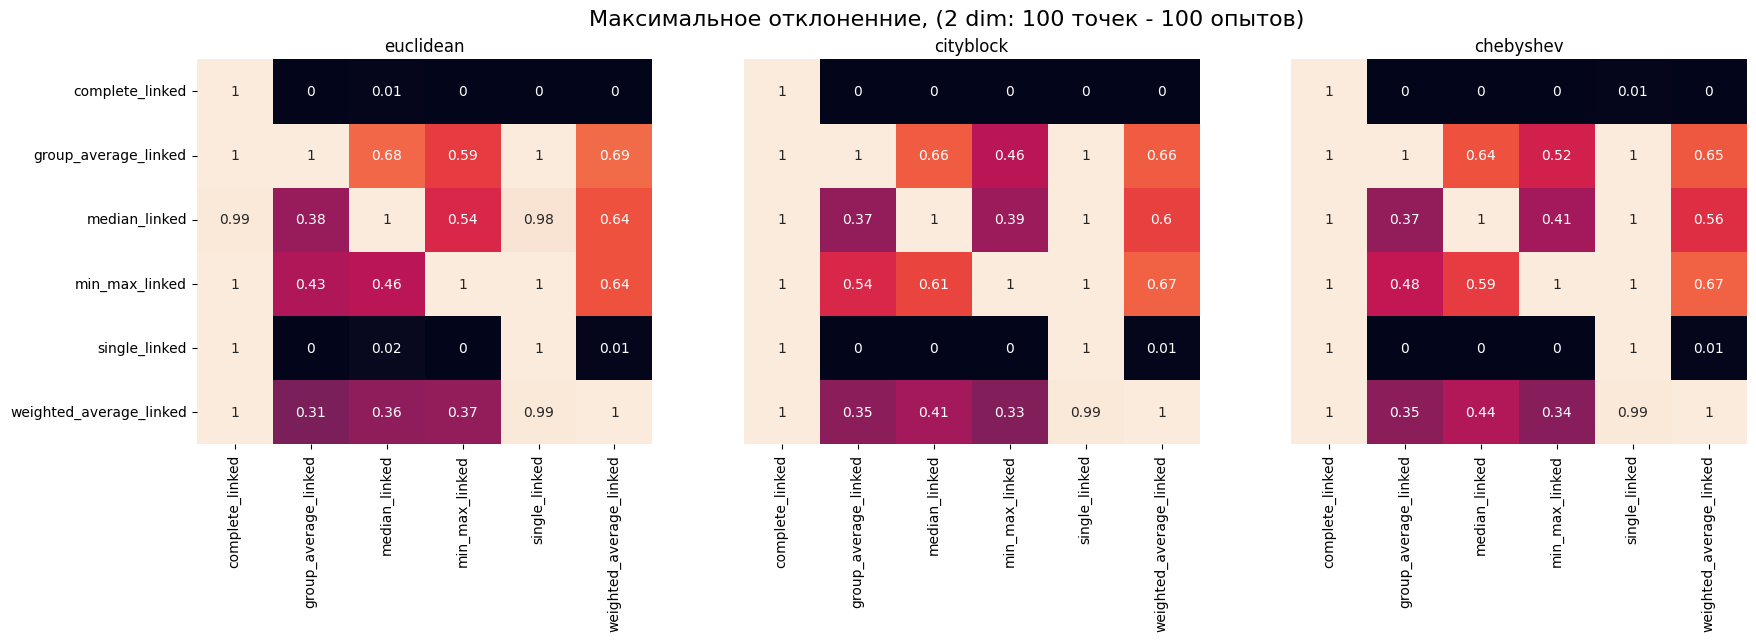

In [9]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))

for k, (dist_metric, resmax) in enumerate(ResultsForMaxList.items()):
    if k == 0:
        sns.heatmap(data=times_when_method_better(resmax), ax=axes[k], annot=True, cbar=False)
        axes[k].set_title(dist_metric)
    else:
        sns.heatmap(data=times_when_method_better(resmax), ax=axes[k], annot=True, cbar=False, yticklabels=False)
        axes[k].set_title(dist_metric)

fig.suptitle(f'Максимальное отклоненние, ({dim} dim: {sample_size} точек - {iter_number} опытов)', fontsize=16)
plt.show()

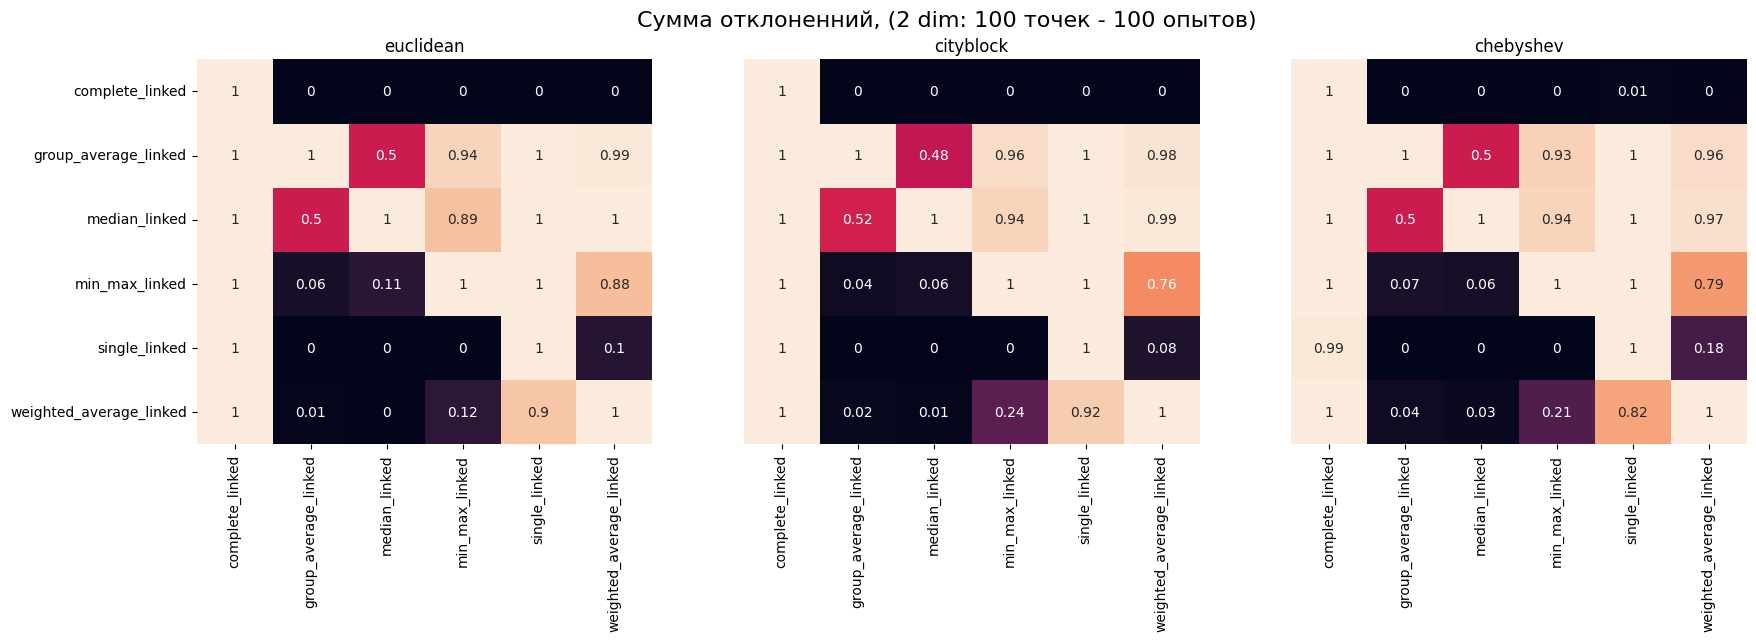

In [10]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))

for k, (dist_metric, ressum) in enumerate(ResultsForSumList.items()):
    if k == 0:
        sns.heatmap(data=times_when_method_better(ressum), ax=axes[k], annot=True, cbar=False)
        axes[k].set_title(dist_metric)
    else:
        sns.heatmap(data=times_when_method_better(ressum), ax=axes[k], annot=True, cbar=False, yticklabels=False)
        axes[k].set_title(dist_metric)

fig.suptitle(f'Сумма отклоненний, ({dim} dim: {sample_size} точек - {iter_number} опытов)', fontsize=16)
plt.show()

In [11]:
print("Метрика Максимального отклонения: случаи когда min_max_linked больше другого метода\n")
for dist_metric, resmax in ResultsForMaxList.items():
    print(dist_metric.upper())
    flag = 0
    for col in resmax.columns:
        exp = list(resmax.query(f'min_max_linked > {col}').index)
        if len(exp) != 0:
            print(f"{col}: {exp}\n")
            flag += 1

    if flag == 0:
        print("Случаев не обнаружено\n")

Метрика Максимального отклонения: случаи когда min_max_linked больше другого метода

EUCLIDEAN
group_average_linked: [0, 2, 3, 5, 8, 10, 12, 13, 14, 17, 18, 19, 21, 25, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 49, 51, 52, 53, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 73, 75, 76, 77, 79, 80, 83, 84, 90, 91, 92, 93, 96, 98]

median_linked: [0, 1, 3, 6, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 25, 30, 31, 35, 36, 37, 38, 39, 40, 41, 43, 44, 49, 50, 51, 52, 53, 56, 60, 61, 64, 65, 69, 71, 73, 75, 76, 77, 79, 80, 81, 83, 87, 90, 91, 92, 93, 95, 96, 98]

weighted_average_linked: [0, 1, 3, 4, 5, 12, 14, 18, 21, 29, 31, 32, 33, 35, 36, 39, 41, 43, 51, 52, 53, 60, 63, 64, 65, 71, 73, 76, 77, 78, 79, 83, 91, 92, 95, 96]

CITYBLOCK
group_average_linked: [0, 3, 5, 6, 11, 13, 15, 18, 21, 23, 27, 28, 29, 31, 34, 36, 38, 39, 40, 41, 43, 45, 49, 50, 51, 52, 57, 59, 61, 65, 66, 68, 69, 70, 71, 73, 74, 75, 80, 81, 82, 87, 88, 93, 96, 98]

median_linked: [0, 3, 5, 6, 10, 11, 17, 21, 23, 2

In [12]:
print("Метрика Суммы отклонений: случаи когда median_linked больше другого метода\n")
for dist_metric, ressum in ResultsForSumList.items():
    print(dist_metric.upper())
    flag = 0
    for col in ressum.columns:
        exp = list(ressum.query(f'median_linked > {col}').index)
        if len(exp) != 0:
            print(f"{col}: {exp}\n")
            flag += 1

    if flag == 0:
        print("Случаев не обнаружено\n")

Метрика Суммы отклонений: случаи когда median_linked больше другого метода

EUCLIDEAN
group_average_linked: [0, 2, 3, 5, 7, 9, 12, 13, 14, 17, 24, 25, 26, 27, 28, 29, 31, 33, 34, 36, 37, 38, 39, 41, 43, 44, 45, 47, 49, 50, 52, 53, 54, 55, 59, 61, 62, 63, 66, 67, 68, 71, 72, 73, 76, 79, 81, 84, 91, 92]

min_max_linked: [15, 24, 26, 28, 29, 45, 50, 54, 62, 63, 67]

CITYBLOCK
group_average_linked: [1, 2, 3, 4, 5, 7, 8, 11, 12, 13, 14, 15, 18, 22, 25, 26, 28, 29, 30, 31, 35, 37, 38, 40, 42, 44, 45, 49, 51, 52, 56, 59, 62, 63, 64, 65, 66, 67, 70, 75, 76, 80, 81, 82, 90, 92, 96, 98]

min_max_linked: [14, 25, 26, 45, 62, 64]

weighted_average_linked: [15]

CHEBYSHEV
group_average_linked: [1, 2, 3, 6, 7, 9, 11, 12, 13, 14, 18, 19, 21, 25, 26, 27, 31, 32, 34, 36, 39, 41, 49, 50, 51, 52, 55, 56, 62, 63, 64, 65, 69, 71, 73, 74, 75, 76, 78, 80, 84, 85, 86, 89, 91, 92, 93, 94, 95, 98]

min_max_linked: [1, 14, 39, 50, 70, 86]

weighted_average_linked: [54, 79, 89]



## Анализ

In [13]:
from Hierarchy.MedianMethod import MedianHierarchy
from Hierarchy.MinMaxMethod import MinMaxHierarchy
from Hierarchy.StandartMethods import hierarchy
from Hierarchy.ToCulcMethods.Linkages import single_linked, complete_linked, group_average_linked, weighted_average_linked

In [14]:
test_data = Samples[99]
pd.DataFrame(test_data, columns=['x', 'y'])

,x,y
0,-1493,286
1,-200,307
2,67,1290
3,672,873
4,-692,392
...,...,...
95,-647,-1526
96,53,809
97,-402,805
98,-785,-2090


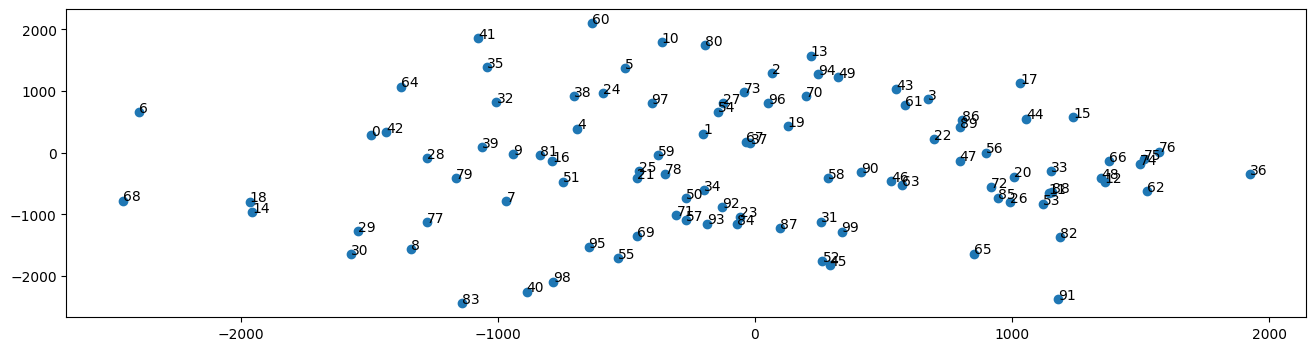

In [15]:
fig = plt.figure()
fig.set_size_inches(16, 4)
plt.scatter(test_data[:, 0], test_data[:, 1])

for i in range(len(test_data)):
    plt.text(test_data[i][0], test_data[i][1] + 0.005, str(i))

In [16]:
# ('euclidean', 'cityblock', 'chebyshev'):
# MinMaxHierarchy(test_data, logs_turn_on=True, metric='euclidean')
MedianHierarchy(test_data, logs_turn_on=True, metric='euclidean')

Distance matrix: 0 step
             0            1            2            3            4   \
0      0.000000  1293.170522  1855.159292  2243.166066   807.983292   
1   1293.170522     0.000000  1018.615727  1039.586456   499.288494   
2   1855.159292  1018.615727     0.000000   734.788405  1175.791223   
3   2243.166066  1039.586456   734.788405     0.000000  1446.325344   
4    807.983292   499.288494  1175.791223  1446.325344     0.000000   
..          ...          ...          ...          ...          ...   
95  1999.764986  1886.716195  2905.107915  2737.692824  1918.527821   
96  1632.067707   562.150336   481.203699   622.299767   853.764605   
97  1208.156447   537.408597   674.674736  1076.150547   504.647402   
98  2479.241820  2467.353643  3485.728618  3301.850693  2483.741734   
99  2409.880495  1677.286499  2586.133021  2180.882849  1964.972519   

             5            6            7            8            9   ...  \
0   1466.023533   978.310789  1192.740123  1851

((((((((((((34, 50), 92), (((84, 93), 23), (57, 71))), ((31, 99), 87)),
        ((55, 95), 69)),
       ((58, 90), (46, 63))),
      ((((((28, 79), (((9, 81), 16), 39)), 4), ((((21, 25), 78), 59), 51)), 7),
       (0, 42))),
     ((((14, 18), 68), ((29, 77), (8, 30))), ((40, 98), 83))),
    ((((65, 82), (45, 52)), 91),
     ((((((12, 48), 62), (20, 33)), (((74, 75), 66), 76)),
       ((((26, 85), 53), (11, 88)), 72)),
      36))),
   (((((((27, 54), 97), ((70, 96), 73)), (((49, 94), 2), 13)),
      (((37, 67), 1), 19)),
     (((((86, 89), 22), (15, 44)), (47, 56)), (((3, 61), 43), 17))),
    (((41, 60), ((10, 80), 5)), ((35, 64), ((24, 38), 32))))),
  6),
 array([[   0.        , 1293.1705224 , 1855.15929235, ..., 1208.15644682,
         2479.24181959, 2409.88049496],
        [1293.1705224 ,    0.        , 1018.61572735, ...,  537.40859688,
         2467.35364308, 1677.28649908],
        [1855.15929235, 1018.61572735,    0.        , ...,  674.67473645,
         3485.72861824, 2586.13302

In [17]:
hierarchy(test_data, metric='euclidean', method=single_linked, logs_turn_on=True)

Distance matrix: 0 step
             0            1            2            3            4   \
0      0.000000  1293.170522  1855.159292  2243.166066   807.983292   
1   1293.170522     0.000000  1018.615727  1039.586456   499.288494   
2   1855.159292  1018.615727     0.000000   734.788405  1175.791223   
3   2243.166066  1039.586456   734.788405     0.000000  1446.325344   
4    807.983292   499.288494  1175.791223  1446.325344     0.000000   
..          ...          ...          ...          ...          ...   
95  1999.764986  1886.716195  2905.107915  2737.692824  1918.527821   
96  1632.067707   562.150336   481.203699   622.299767   853.764605   
97  1208.156447   537.408597   674.674736  1076.150547   504.647402   
98  2479.241820  2467.353643  3485.728618  3301.850693  2483.741734   
99  2409.880495  1677.286499  2586.133021  2180.882849  1964.972519   

             5            6            7            8            9   ...  \
0   1466.023533   978.310789  1192.740123  1851

(((((((14, 18), 68),
     ((((((((((((((((((((((21, 25), 78), 59), 51),
                       (((31, 99), ((((((57, 71), 93), 84), 23), 92), 87)),
                        (34, 50))),
                      ((55, 95), 69)),
                     ((((9, 81), 16), 39), 28)),
                    79),
                   7),
                  (((((((((24, 38), 97), ((((27, 54), 96), 70), 73)), 32),
                       ((((49, 94), 2), 13), ((3, 61), 43))),
                      ((((86, 89), 22), (15, 44)), (47, 56))),
                     ((((12, 48), 62),
                       (((((26, 85), 53), 72), (11, 88)), (20, 33))),
                      (((74, 75), 66), 76))),
                    ((58, 90), (46, 63))),
                   (((37, 67), 1), 19))),
                 5),
                (0, 42)),
               17),
              ((10, 80), 60)),
             64),
            4),
           ((40, 98), 83)),
          36),
         ((29, 77), (8, 30))),
        35),
       41),
      (45